In [11]:
# %pip install torch pandas torchvision scikit-learn tqdm kaggle torchmetrics -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
# upload kaggle.json first.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# !apt update -qq
# !apt install -qq unzip
!kaggle datasets download nirmalsankalana/sugarcane-leaf-disease-dataset
!unzip -q sugarcane-leaf-disease-dataset.zip -d data

Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/sugarcane-leaf-disease-dataset
License(s): CC0-1.0


In [1]:
from dataset import get_mean_teacher_dataloaders

train_loader, test_loader, unlabeled_loader, unlabeled_student_loader = get_mean_teacher_dataloaders('data', 0.2, 16)

In [2]:
from coreplant import Classifier
import torch

NUM_CLASSES = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

student = Classifier(512, 256, NUM_CLASSES).to(device)
teacher = Classifier(512, 256, NUM_CLASSES).to(device)

# # Synchronize initial weights
teacher.encoder.load_state_dict(student.encoder.state_dict())
teacher.load_state_dict(student.state_dict())

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>

In [3]:
from train import mean_teacher_train, validate, plot

student_model, results = mean_teacher_train(student, teacher, train_loader, test_loader, unlabeled_loader,unlabeled_student_loader, NUM_CLASSES)

Epoch 1 - Train Loss: 0.9669 Acc: 0.5933


Validation Loss: 1.0751 Acc: 0.7129


Epoch 2 - Train Loss: 0.6921 Acc: 0.9534


Validation Loss: 1.0058 Acc: 0.6337


Epoch 3 - Train Loss: 0.5936 Acc: 0.9871


Validation Loss: 0.9520 Acc: 0.7327


Epoch 4 - Train Loss: 0.5735 Acc: 0.9921


Validation Loss: 1.1093 Acc: 0.7624


Epoch 5 - Train Loss: 0.5805 Acc: 0.9931


Validation Loss: 1.2088 Acc: 0.6535


Epoch 6 - Train Loss: 0.5997 Acc: 0.9906


Validation Loss: 1.2791 Acc: 0.6832


Epoch 7 - Train Loss: 0.6033 Acc: 0.9960


Validation Loss: 1.2851 Acc: 0.7129


Epoch 8 - Train Loss: 0.6383 Acc: 0.9955


Validation Loss: 1.2957 Acc: 0.7525


Epoch 9 - Train Loss: 0.6469 Acc: 0.9965


Validation Loss: 1.2491 Acc: 0.7327


Epoch 10 - Train Loss: 0.6597 Acc: 0.9985


Validation Loss: 1.2907 Acc: 0.7624


Epoch 11 - Train Loss: 0.6739 Acc: 0.9970


Validation Loss: 1.2727 Acc: 0.7921


Epoch 12 - Train Loss: 0.6986 Acc: 0.9965


Validation Loss: 1.2876 Acc: 0.8020


Epoch 13 - Train Loss: 0.7012 Acc: 0.9985


Validation Loss: 1.3070 Acc: 0.6337


Epoch 14 - Train Loss: 0.7089 Acc: 0.9970


Validation Loss: 1.2998 Acc: 0.7228


Epoch 15 - Train Loss: 0.7142 Acc: 0.9975


Validation Loss: 1.2990 Acc: 0.7624


Epoch 16 - Train Loss: 0.7181 Acc: 0.9936


Validation Loss: 1.3175 Acc: 0.7525


Epoch 17 - Train Loss: 0.7199 Acc: 0.9921


Validation Loss: 1.3741 Acc: 0.6733


Epoch 18 - Train Loss: 0.7261 Acc: 0.9871


Validation Loss: 1.4587 Acc: 0.7525


Epoch 19 - Train Loss: 0.7460 Acc: 0.9856


Validation Loss: 1.3727 Acc: 0.6931


Epoch 20 - Train Loss: 0.7452 Acc: 0.9851


Validation Loss: 1.4956 Acc: 0.3960


Epoch 21 - Train Loss: 0.7395 Acc: 0.9851


Validation Loss: 1.4490 Acc: 0.5842


Epoch 22 - Train Loss: 0.7491 Acc: 0.9916


Validation Loss: 1.4563 Acc: 0.5347


Epoch 23 - Train Loss: 0.7618 Acc: 0.9921


Validation Loss: 1.3545 Acc: 0.7525


Epoch 24 - Train Loss: 0.7594 Acc: 0.9896


Validation Loss: 1.4820 Acc: 0.4554


Epoch 25 - Train Loss: 0.7588 Acc: 0.9970


Validation Loss: 1.5111 Acc: 0.3861


Epoch 26 - Train Loss: 0.7752 Acc: 0.9916


Validation Loss: 1.4428 Acc: 0.5842


Epoch 27 - Train Loss: 0.7753 Acc: 0.9985


Validation Loss: 1.4036 Acc: 0.6931


Epoch 28 - Train Loss: 0.7685 Acc: 0.9965


Validation Loss: 1.4063 Acc: 0.6634


Epoch 29 - Train Loss: 0.7910 Acc: 0.9985


Validation Loss: 1.4430 Acc: 0.4851


Epoch 30 - Train Loss: 0.8158 Acc: 0.9945


Validation Loss: 1.4121 Acc: 0.6634


Epoch 31 - Train Loss: 0.8174 Acc: 0.9975


Validation Loss: 1.4690 Acc: 0.4158


Epoch 32 - Train Loss: 0.8119 Acc: 0.9975


Validation Loss: 1.4666 Acc: 0.4752


Epoch 33 - Train Loss: 0.8281 Acc: 0.9985


Validation Loss: 1.4412 Acc: 0.6436


Epoch 34 - Train Loss: 0.8392 Acc: 0.9965


Validation Loss: 1.5037 Acc: 0.3069


Epoch 35 - Train Loss: 0.8356 Acc: 0.9980


Validation Loss: 1.5167 Acc: 0.3168
Best Val Acc: 0.8020


In [ ]:
torch.save(student_model.state_dict(), 'models/coreplant_nirmal.pth')

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
                                                         

Validation Accuracy: 0.7030
Validation Precision: 0.7306
Validation Recall: 0.7133
Validation F1 Score: 0.7164


<Figure size 720x576 with 0 Axes>

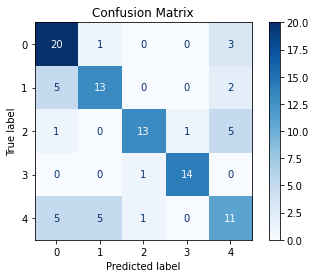

In [1]:
from train import validate
from dataset import get_mean_teacher_dataloaders
from coreplant import Classifier
import torch

NUM_CLASSES = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Classifier(512, 256, NUM_CLASSES).to(device)
state_dict = torch.load('models/coreplant_nirmal.pth')

model.load_state_dict(state_dict)
model.eval()

train_loader, test_loader, unlabeled_loader, unlabeled_student_loader = get_mean_teacher_dataloaders('data', 0.2, 16)
validate(model, test_loader, NUM_CLASSES)